In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [3]:
df=pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [4]:
data=df.copy()

In [5]:
data.shape

(129971, 14)

In [6]:
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [7]:
data.describe(include="all")

Unnamed: 0 country  \
count   129971.000000  129908   
unique            NaN      43   
top               NaN      US   
freq              NaN   54504   
mean     64985.000000     NaN   
std      37519.540256     NaN   
min          0.000000     NaN   
25%      32492.500000     NaN   
50%      64985.000000     NaN   
75%      97477.500000     NaN   
max     129970.000000     NaN   

                                              description designation  \
count                                              129971       92506   
unique                                             119955       37979   
top     Seductively tart in lemon pith, cranberry and ...     Reserve   
freq                                                    3        2009   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

               points          price    province     region_1       region_2  \
count   129971.000000  120975.000000      129908       108724          50511   
unique            NaN            NaN         425         1229             17   
top               NaN            NaN  California  Napa Valley  Central Coast   
freq              NaN            NaN       36247         4480          11065   
mean        88.447138      35.363389         NaN          NaN            NaN   
std          3.039730      41.022218         NaN          NaN            NaN   
min         80.000000       4.000000         NaN          NaN            NaN   
25%         86.000000      17.000000         NaN          NaN            NaN   
50%         88.000000      25.000000         NaN          NaN            NaN   
75%         91.000000      42.000000         NaN          NaN            NaN   
max        100.000000    3300.000000         NaN          NaN            NaN   

       taster_name taster_twitter_handle  \
count       103727                 98758   
unique          19                    15   
top     Roger Voss            @vossroger   
freq         25514                 25514   
mean           NaN                   NaN   
std            NaN                   NaN   
min            NaN                   NaN   
25%            NaN                   NaN   
50%            NaN                   NaN   
75%            NaN                   NaN   
max            NaN                   NaN   

                                                    title     variety  \
count                                              129971      129970   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                   11       13272   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               129971  
unique               16757  
top     Wines & Winemakers  
freq                   222  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

### This is for hide warning messages

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Remove Extra Columns

In [9]:
df=df.drop(columns=["Unnamed: 0","country","designation","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery"],axis=1)

## After removing extra columns

In [10]:
df.head(100)

description  points  price
0   Aromas include tropical fruit, broom, brimston...      87    NaN
1   This is ripe and fruity, a wine that is smooth...      87   15.0
2   Tart and snappy, the flavors of lime flesh and...      87   14.0
3   Pineapple rind, lemon pith and orange blossom ...      87   13.0
4   Much like the regular bottling from 2012, this...      87   65.0
..                                                ...     ...    ...
95  This is a dense wine, packed with both tannins...      88   20.0
96  The wine comes from one of the cru estates fol...      88   18.0
97  A wisp of bramble extends a savory tone from n...      88   20.0
98  Forest floor, menthol, espresso, cranberry and...      88   30.0
99  This blends 20% each of all five red-Bordeaux ...      88   75.0

[100 rows x 3 columns]

# Check NULL values

In [11]:
Missing=df.isnull().sum()
Missing

description       0
points            0
price          8996
dtype: int64

#### As we see that price column having 8996 null values so we replace null values with the mean of price

In [12]:
df['price']=df['price'].replace(np.NaN,'35')

In [13]:
Missing=df.isnull().sum()
Missing

description    0
points         0
price          0
dtype: int64

##### Now, There is no null values in the data

## Reduce data

In [14]:
df80=df[df['points']==80]
df81=df[df['points']==81]
df82=df[df['points']==82]
df83=df[df['points']==83]
df84=df[df['points']==84]
df85=df[df['points']==85]
df86=df[df['points']==86]
df87=df[df['points']==87]
df88=df[df['points']==88]
df89=df[df['points']==89]
df90=df[df['points']==90]
df91=df[df['points']==91]
df92=df[df['points']==92]
df93=df[df['points']==93]
df94=df[df['points']==94]
df95=df[df['points']==95]
df96=df[df['points']==96]
df97=df[df['points']==97]
df98=df[df['points']==98]
df99=df[df['points']==99]
df100=df[df['points']==100]


In [15]:
df80.shape,df81.shape,df82.shape,df83.shape,df84.shape,df85.shape,df86.shape,df87.shape,df88.shape,df89.shape,df90.shape,df91.shape,df92.shape,df93.shape,df94.shape,df95.shape,df96.shape,df97.shape,df98.shape,df99.shape,df100.shape

((397, 3),
 (692, 3),
 (1836, 3),
 (3025, 3),
 (6480, 3),
 (9530, 3),
 (12600, 3),
 (16933, 3),
 (17207, 3),
 (12226, 3),
 (15410, 3),
 (11359, 3),
 (9613, 3),
 (6489, 3),
 (3758, 3),
 (1535, 3),
 (523, 3),
 (229, 3),
 (77, 3),
 (33, 3),
 (19, 3))

### As data set having one lakh+ entries so we reduce it by 10

In [16]:
df80=df80[:int(df80.shape[0]/10)]
df81=df81[:int(df81.shape[0]/10)]
df82=df82[:int(df82.shape[0]/10)]
df83=df83[:int(df83.shape[0]/10)]
df84=df84[:int(df84.shape[0]/10)]
df85=df85[:int(df85.shape[0]/10)]
df86=df86[:int(df86.shape[0]/10)]
df87=df87[:int(df87.shape[0]/10)]
df88=df88[:int(df88.shape[0]/10)]
df89=df89[:int(df89.shape[0]/10)]
df90=df90[:int(df90.shape[0]/10)]
df91=df91[:int(df91.shape[0]/10)]
df92=df92[:int(df92.shape[0]/10)]
df93=df93[:int(df93.shape[0]/10)]
df94=df94[:int(df94.shape[0]/10)]
df95=df95[:int(df95.shape[0]/10)]
df96=df96[:int(df96.shape[0]/10)]
df97=df97[:int(df97.shape[0]/10)]
df98=df98[:int(df98.shape[0]/10)]
df99=df99[:int(df99.shape[0]/10)]
df100=df100[:int(df100.shape[0]/10)]



In [17]:
df80.shape,df81.shape,df82.shape,df83.shape,df84.shape,df85.shape,df86.shape,df87.shape,df88.shape,df89.shape,df90.shape,df91.shape,df92.shape,df93.shape,df94.shape,df95.shape,df96.shape,df97.shape,df98.shape,df99.shape,df100.shape

((39, 3),
 (69, 3),
 (183, 3),
 (302, 3),
 (648, 3),
 (953, 3),
 (1260, 3),
 (1693, 3),
 (1720, 3),
 (1222, 3),
 (1541, 3),
 (1135, 3),
 (961, 3),
 (648, 3),
 (375, 3),
 (153, 3),
 (52, 3),
 (22, 3),
 (7, 3),
 (3, 3),
 (1, 3))

### Now,Combine data

In [18]:
finaldata=pd.concat([df80,df81,df82,df83,df84,df85,df86,df87,df88,df89,df90,df91,df92,df93,df94,df95,df96,df97,df98,df99,df100],axis=0)

In [19]:
finaldata.shape

(12987, 3)

In [20]:
finaldata.head()

description  points price
344   Aromas of pumpkin, squash and corn chips are s...      80  19.0
3640  Aromas of strawberry sherbet are followed by s...      80   8.0
3641  Fluffy, sweet aromas of peach, pear and vanill...      80  15.0
4556  There's a thorny, almost raw quality of fruit ...      80  12.0
4557  With dusty, candied aromas, the bouquet on thi...      80  14.0

# **Data Cleaning**

## Remove Hashtags

In [21]:
finaldata['description'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

## Remove mentions

In [22]:
finaldata['description'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

## Remove URLs

In [23]:
finaldata['description'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

## Convert into lower case letters

In [24]:
finaldata['description']=finaldata['description'].str.lower()

## Remove Stopwords

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

finaldata['description'] = finaldata['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Remove Punctuations

In [26]:
finaldata["description"] = finaldata['description'].str.replace('[^\w\s]','', regex = True)

## Stemming

In [27]:
finaldata=finaldata.reset_index()
finaldata

index                                        description  points  price
0        344  aromas pumpkin squash corn chips stale invitin...      80   19.0
1       3640  aromas strawberry sherbet followed sweet candy...      80    8.0
2       3641  fluffy sweet aromas peach pear vanilla good ge...      80   15.0
3       4556  theres thorny almost raw quality fruit backed ...      80   12.0
4       4557  dusty candied aromas bouquet semisweet cava sc...      80   14.0
...      ...                                                ...     ...    ...
12982  16522  layers upon layers spicy saffron peach honey c...      98  775.0
12983   1556  flagship wine quilceda creek offers exotic sce...      99  125.0
12984   1557  stupendous pinot noir showing beautifully vine...      99   94.0
12985  35517  one italys iconic bottlings 2012 sassicaia dro...      99  235.0
12986    345  wine contains material 100 years old shows sig...     100  350.0

[12987 rows x 4 columns]

#### Remove extra index column

In [28]:
finaldata=finaldata.drop(columns=["index"],axis=1)

In [29]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from functools import reduce

ps = PorterStemmer()
for i in range(1,len(finaldata["description"])):
    sentance=sent_tokenize(finaldata["description"][i])
   
    words = word_tokenize(str(sentance),language='english',)

# using reduce to apply stemmer to each word and join them back into a string
    finaldata["description"][i] = reduce(lambda x, y: x + " " + ps.stem(y), words, "")




# Randomize Data

In [30]:
finaldata=finaldata.sample(frac=1,replace=True)

# EDA for Final Data set

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
points=finaldata["points"].value_counts()
points

87     1687
88     1677
90     1547
86     1226
89     1216
91     1198
92     1004
85      962
84      652
93      646
94      348
83      297
82      177
95      158
81       69
96       48
80       39
97       27
98        5
100       2
99        2
Name: points, dtype: int64

In [33]:
tickvalues=['80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100']

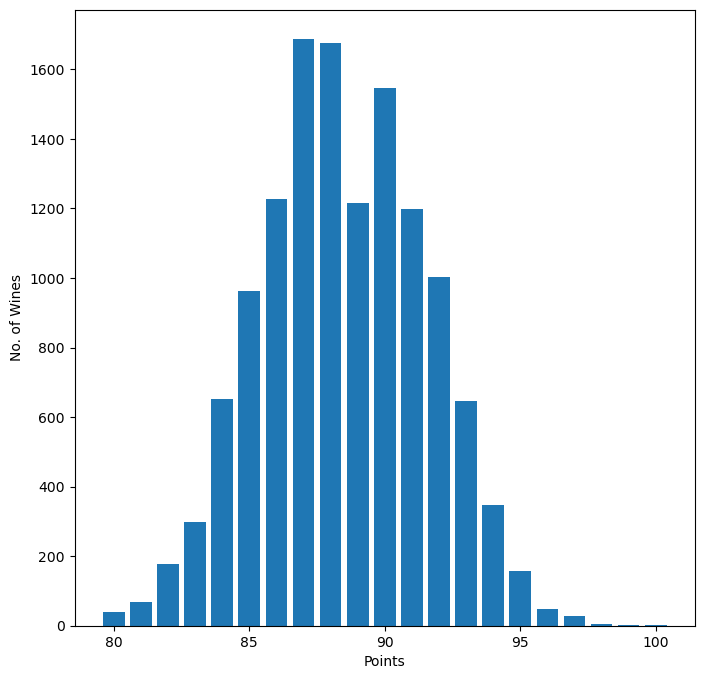

In [34]:
plt.figure(figsize=(8,8))
plt.bar(points.index,points.values)
plt.xlabel("Points")
plt.ylabel("No. of Wines")

plt.show()

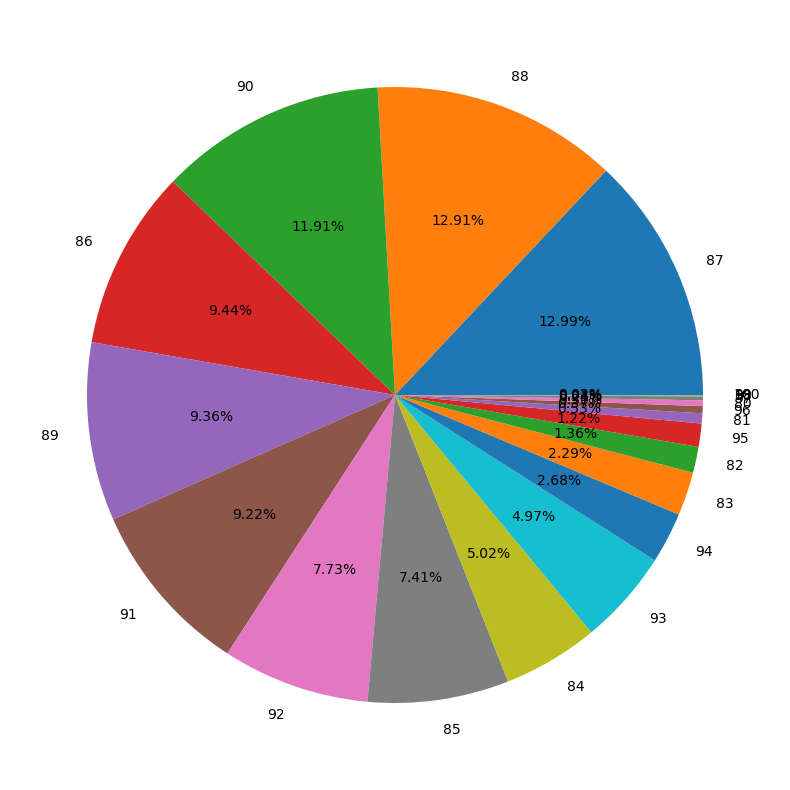

In [35]:
plt.figure(figsize=(10, 10))
plt.pie(x=points.values,labels=points.index ,autopct='%.2f%%')
# plt.title('The Difference in the Type of Ratings')
plt.show()

In [36]:
price=finaldata["price"].value_counts()
price

35        838
20.0      690
15.0      587
25.0      581
30.0      507
         ... 
187.0       1
2500.0      1
270.0       1
299.0       1
220.0       1
Name: price, Length: 171, dtype: int64

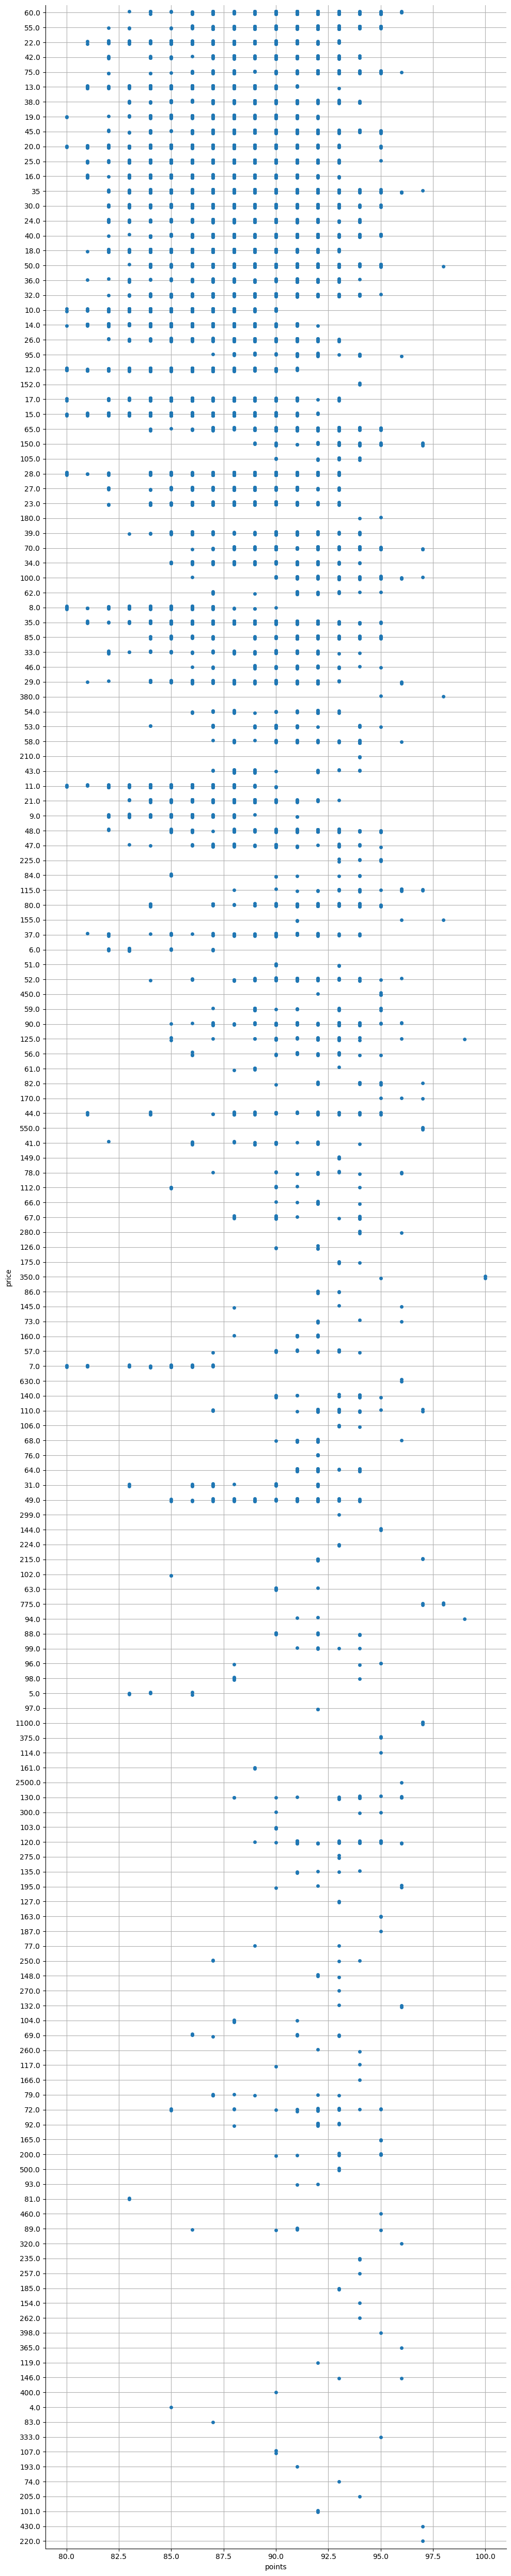

In [113]:
sns.catplot(y='price',x='points',data=finaldata,height=50,aspect=0.2)
plt.grid()

## Word Cloud

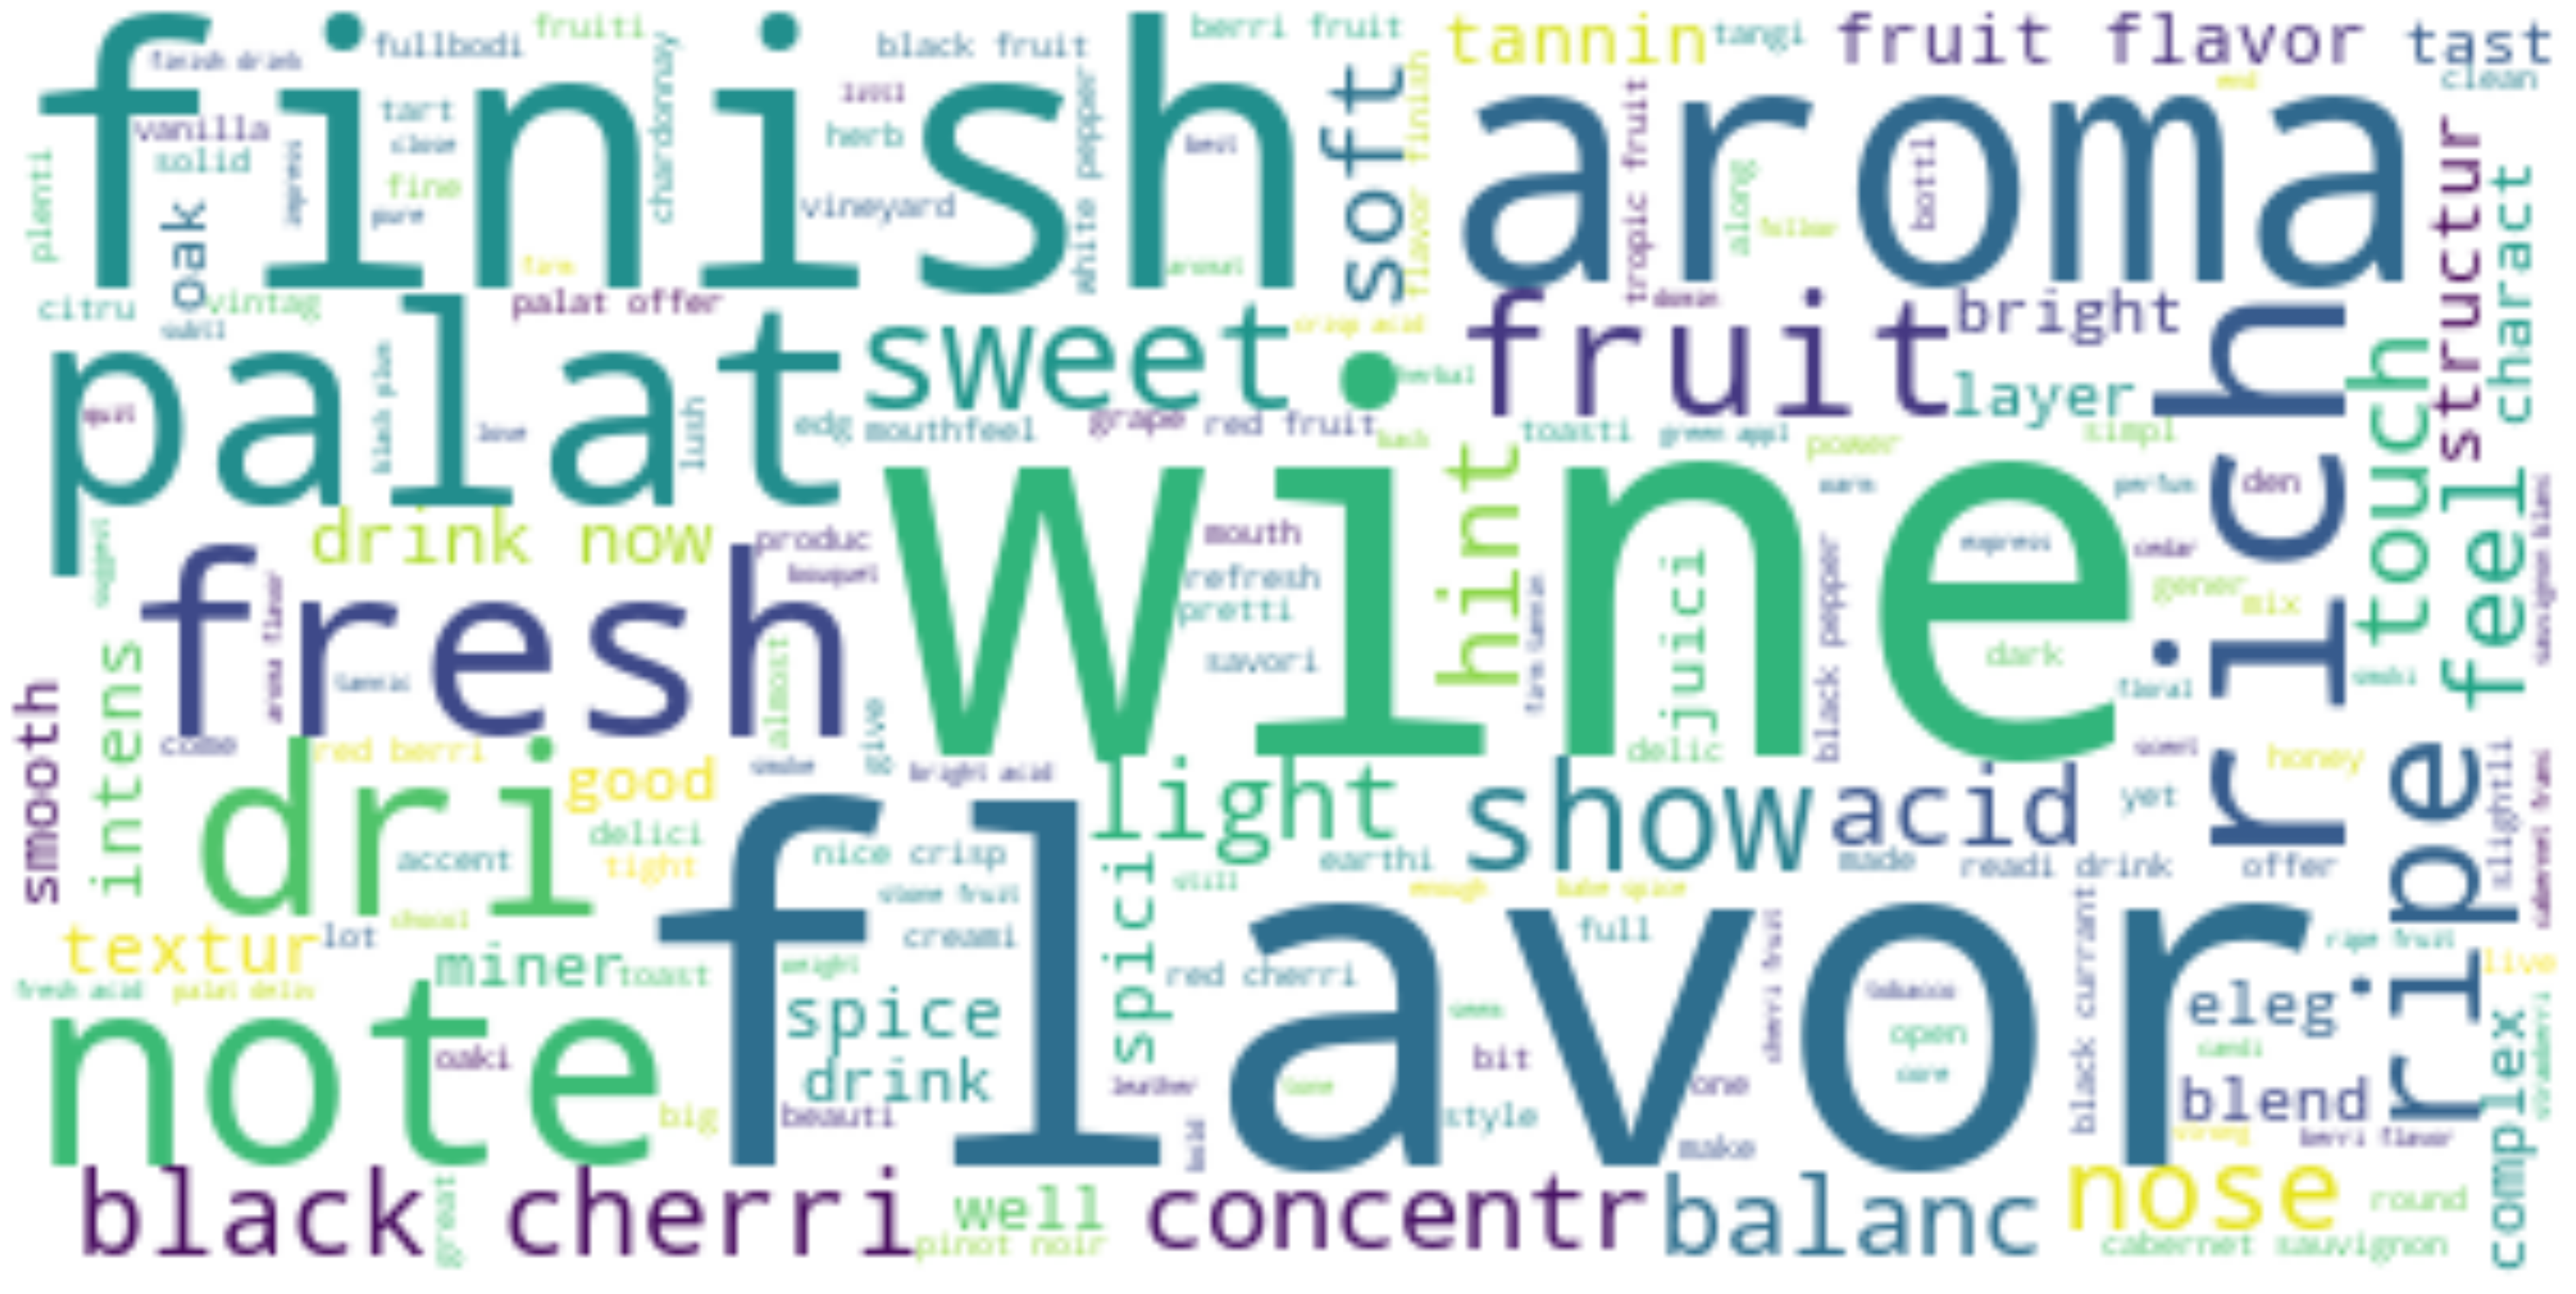

In [38]:
from wordcloud import WordCloud, STOPWORDS

plt.rcParams['figure.figsize'] = (50, 50)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(' '.join(finaldata['description']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Vectorization**

 # **1. TF-IDF**

In [39]:
y = finaldata['points']
x = finaldata['description']
z = finaldata['price']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
x = pd.DataFrame(denselist1, columns=feature_names1)

# Split Data

In [40]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [41]:
accuracy = {'TF-IDF':[]}

# Apply Models

In [42]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linearregressor_LR_tf = LinearRegression()
linearregressor_LR_tf.fit(X_temp, y_temp)

LinearRegression()

In [45]:
y_predict_LinearR_tf = linearregressor_LR_tf.predict(X_test)
y_predict_LinearR_tf

array([87.7315486 , 88.54919531, 87.62700253, ..., 87.15881933,
       86.46827468, 89.92038849])

In [46]:
a=(linearregressor_LR_tf.score(X_test, y_test))*100
a

62.628858489724394

In [47]:
accuracy['TF-IDF'].append(a)

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)


LogisticRegression(solver='newton-cg')

In [49]:
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
y_predict_LR_tf

array([88, 89, 86, ..., 87, 85, 88])

In [50]:
a=(regressor_LR_tf.score(X_test, y_test))*100
a

33.872209391839874

In [51]:
accuracy['TF-IDF'].append(a)

In [52]:
print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[  0   0   0   1   2   2   1   2   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   7   3   1   5   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   3   4  11   3   4   4   8   2   0   1   1   0   0   0   0   0
    0   0]
 [  0   0   0  10   7  12  13  13   5   2   1   2   1   0   0   0   0   0
    0   0]
 [  0   0   0   0  41  18  30  19  20   1   4   1   2   0   0   0   0   0
    0   0]
 [  0   0   0   1  12  62  25  45  23   8  14   3   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   9  24  80  64  54  12   6   4   6   0   1   0   0   0
    0   0]
 [  0   0   0   0   9  17  22 163  77  14  28  18   8   3   1   0   0   0
    0   0]
 [  0   0   0   0   1  13  25  63 126  24  33  22  15   4   1   0   0   0
    0   0]
 [  0   0   0   0   0   9  15  36  45  61  34  16  16   5   0   0   0   0
    0   0]
 [  0   0   0   0   0   4   5  30  45  40 130  31  21   5   0   0   0   0
    0   0]
 [  0   0   0   0   0   2   4  19  24  17  40  86  17   5   2   0

## Dicision Tree

In [53]:
from sklearn import tree

In [54]:
model_DT_tf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)

DecisionTreeClassifier(max_depth=2)

In [55]:
y_predict_DT_tf = model_DT_tf.predict(X_test)
y_predict_DT_tf

array([88, 90, 90, ..., 87, 88, 90])

In [56]:
a=(model_DT_tf.score(X_test,y_test))*100
a

14.049268668206313

In [57]:
accuracy['TF-IDF'].append(a)

In [58]:
print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[  0   0   0   0   0   0   0   1   5   0   3   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   0   1   6   0  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   6  20   0  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   4   0   0   6  24   0  32   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   4   0   0  23  59   0  50   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  34  71   0  90   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   0  54  87   0 117   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  85  98   0 177   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  77  73   0 177   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  48  49   0 140   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  49  59   0 203   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  21  18   0 177   0   0   0   0   0

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)

RandomForestClassifier(max_features='log2')

In [61]:
y_predict_RF_tf = model_RF_tf.predict(X_test)
y_predict_RF_tf

array([85, 89, 86, ..., 85, 88, 90])

In [62]:
a=(model_RF_tf.score(X_test,y_test))*100
a

64.43418013856814

In [63]:
accuracy['TF-IDF'].append(a)

In [64]:
print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[  5   0   0   0   1   1   1   0   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  10   0   1   0   3   0   3   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  22   0   5   4   3   6   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  33   9   5   6   8   5   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  79  10   5  21  17   2   2   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   5 130  16  17  17   2   7   1   0   0   0   0   0   0
    0   0]
 [  0   0   1   1   6  13 151  40  37   1   7   2   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   1  10  18 265  38   6  18   2   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   9   4  56 220   4  24   3   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   2   8  18  26 148  25   6   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   3  27  25  10 228  10   7   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   2   2  13  16   4  32 137   8   2   0   0

## K-Neighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [67]:
y_predict_KN_tf = model_KN_tf.predict(X_test)
y_predict_KN_tf

array([85, 86, 81, ..., 85, 81, 90])

In [68]:
a=(model_KN_tf.score(X_test,y_test))*100
a

62.509622786759046

In [69]:
accuracy['TF-IDF'].append(a)

In [70]:
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[  6   2   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  11   2   2   1   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  4   2  24   2   4   2   0   1   2   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   8   3  39   6   2   1   3   2   0   0   1   0   0   0   0   0   0
    0   0]
 [  5   6   5   4  94   8   2   5   3   3   1   0   0   0   0   0   0   0
    0   0]
 [  1   9   4   2  21 137   8  11   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  2  14   5  15  24  19 146  17   5   4   4   3   1   0   0   0   1   0
    0   0]
 [  3   9   2   8  27  21  15 245  15   2   6   4   3   0   0   0   0   0
    0   0]
 [  1   7   4   4  34  29  14  18 196   6   7   3   3   1   0   0   0   0
    0   0]
 [  0   6   6   8  15   7  14   9  10 148   7   4   0   0   2   0   1   0
    0   0]
 [  3   6   5   5  16  16  11  13  14   7 205   4   3   3   0   0   0   0
    0   0]
 [  1   4   1   3  15   5   6  16  11   7   9 130   4   1   3   0

# **Hyperperameter Tunning**

In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [73]:
# define parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=regressor_LR_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.245958 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.242879 (0.007533) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.245958 (0.009956) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.242687 (0.006233) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.244419 (0.010948) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.244226 (0.011131) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.241532 (0.006478) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.207660 (0.012674) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.207660 (0.012674) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.205543 (0.010832) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.162818 (0.005657) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.162818 (0.005657) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.162625 (0.005052) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.138568 (0.000000) with: {

## KNN

In [74]:
# define parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model_KN_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.245766 using {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
0.220554 (0.011662) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.220554 (0.011662) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.168399 (0.008523) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.227290 (0.009462) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.167821 (0.009444) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.236143 (0.009351) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.168399 (0.007376) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.237490 (0.005106) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.163972 (0.010067) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.240570 (0.004303) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.161085

## Random Forest

In [75]:
# define parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model_RF_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Best: 0.245189 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.222864 (0.004234) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.233641 (0.002694) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.245189 (0.004234) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.207082 (0.010008) with: {'max_features': 'log2', 'n_estimators': 10}
0.237875 (0.003849) with: {'max_features': 'log2', 'n_estimators': 100}
0.242879 (0.001925) with: {'max_features': 'log2', 'n_estimators': 1000}


# **2. Bag of Words**

In [76]:
y = finaldata['points']
x = finaldata['description']
z = finaldata['price']
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = CountVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
x = pd.DataFrame(denselist1, columns=feature_names1)


# Split Data

In [77]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
accuracyBOW = {'BOW':[]}

# Apply Models

## Linear Regression

In [79]:
linearregressor_LR_BOW = LinearRegression()
linearregressor_LR_BOW.fit(X_temp, y_temp)

LinearRegression()

In [80]:
y_predict_LinearR_BOW = linearregressor_LR_BOW.predict(X_test)
y_predict_LinearR_BOW

array([87.92122503, 88.32144754, 87.43291919, ..., 87.22470474,
       86.72840619, 89.5624571 ])

In [81]:
a=(linearregressor_LR_BOW.score(X_test, y_test))*100
a

61.75564164459851

In [82]:
accuracyBOW['BOW'].append(a)

## Logistic Regression

In [83]:
regressor_LR_BOW = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_BOW.fit(X_temp, y_temp)

LogisticRegression(solver='newton-cg')

In [84]:
y_predict_LR_BOW = regressor_LR_BOW.predict(X_test)
y_predict_LR_BOW

array([88, 89, 83, ..., 85, 84, 90])

In [85]:
a=(regressor_LR_BOW.score(X_test, y_test))*100
a

42.80215550423402

In [86]:
accuracyBOW['BOW'].append(a)

In [87]:
print(metrics.confusion_matrix(y_test, y_predict_LR_BOW))
print(metrics.classification_report(y_test, y_predict_LR_BOW))
print(metrics.accuracy_score(y_test, y_predict_LR_BOW))

[[  5   0   1   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   8   1   1   5   1   0   2   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1  18   8   5   3   2   0   2   1   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   2  29  10   8   5   8   3   0   0   1   0   0   0   0   0   0
    0   0]
 [  2   0   3   3  65  20  16   9  13   1   2   1   1   0   0   0   0   0
    0   0]
 [  0   0   5   3  16  83  19  32  12  10   8   3   3   1   0   0   0   0
    0   0]
 [  0   1   3   2  17  31 100  42  36  14   5   2   3   2   2   0   0   0
    0   0]
 [  0   1   0   0  12  24  36 163  67  12  17  17   8   3   0   0   0   0
    0   0]
 [  0   0   0   2   5  22  27  46 126  28  27  17  20   4   3   0   0   0
    0   0]
 [  0   0   0   2   0  13   9  29  39  79  22  22  16   4   2   0   0   0
    0   0]
 [  0   0   0   1   1   7   9  16  38  41 125  40  26   6   1   0   0   0
    0   0]
 [  0   0   0   0   0   4   6  12  20  11  27 105  22   6   3   0

## Dicision Tree

In [88]:
model_DT_BOW = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_BOW.fit(X_temp, y_temp)

DecisionTreeClassifier(max_depth=2)

In [89]:
y_predict_DT_BOW = model_DT_BOW.predict(X_test)
y_predict_DT_BOW

array([88, 88, 88, ..., 88, 88, 88])

In [90]:
a=(model_DT_BOW.score(X_test,y_test))*100
a

13.394919168591224

In [91]:
accuracyBOW['BOW'].append(a)

In [92]:
print(metrics.confusion_matrix(y_test, y_predict_DT_BOW))
print(metrics.classification_report(y_test, y_predict_DT_BOW))
print(metrics.accuracy_score(y_test, y_predict_DT_BOW))

[[  0   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0  17   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   2   0   0  37   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   4   0   0  61   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   4   8   0   0 123   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   8   0   0 185   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   2  12   0   0 246   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   9   0   0 349   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0 322   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   2   0   0 232   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 303   0   0   0   8   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 211   0   0   0   5   0   0   0

## Random Forest

In [93]:
model_RF_BOW = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_BOW.fit(X_temp, y_temp)

RandomForestClassifier(max_features='log2')

In [94]:
y_predict_RF_BOW = model_RF_BOW.predict(X_test)
y_predict_RF_BOW

array([85, 89, 85, ..., 85, 87, 90])

In [95]:
a=(model_RF_BOW.score(X_test,y_test))*100
a

63.93379522709777

In [96]:
accuracyBOW['BOW'].append(a)

In [97]:
print(metrics.confusion_matrix(y_test, y_predict_RF_BOW))
print(metrics.classification_report(y_test, y_predict_RF_BOW))
print(metrics.accuracy_score(y_test, y_predict_RF_BOW))

[[  5   0   1   0   1   1   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  10   0   0   3   2   0   2   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1  21   1   5   1   5   6   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1  34   8   7   3   8   5   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   2   1  85  12   7  15  14   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  18 124  16  16  12   0   6   1   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   6  19 151  43  30   4   7   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   4  14  15 262  42   7  13   3   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   7  11  13  41 230   6  13   4   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   2   5  23  28 152  14   8   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   6  26  35  15 212  11   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   7  14  31   7  20 130   3   3   0   0

## K-Neighbors Classifier

In [98]:
model_KN_BOW = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_BOW.fit(X_temp, y_temp)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [99]:
y_predict_KN_BOW = model_KN_BOW.predict(X_test)
y_predict_KN_BOW

array([85, 86, 81, ..., 85, 84, 90])

In [100]:
a=(model_KN_BOW.score(X_test,y_test))*100
a

59.58429561200924

In [101]:
accuracyBOW['BOW'].append(a)

In [102]:
print(metrics.confusion_matrix(y_test, y_predict_KN_BOW))
print(metrics.classification_report(y_test, y_predict_KN_BOW))
print(metrics.accuracy_score(y_test, y_predict_KN_BOW))

[[  6   0   1   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  12   2   1   1   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  4   6  26   2   2   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  4  10   4  34  12   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  6   7   7   1  92  10   1   5   3   2   2   0   0   0   0   0   0   0
    0   0]
 [ 13  21   4   8  19 127   0   3   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 12  19   5  12  30  20 138  13   6   0   0   3   0   0   0   0   1   1
    0   0]
 [ 10  17   6  21  38  28  10 226   1   0   1   0   2   0   0   0   0   0
    0   0]
 [ 12  13  12  10  39  26  17  10 182   3   2   0   1   0   0   0   0   0
    0   0]
 [  5   6   8  12  27  19   1   1   8 142   3   3   0   0   0   0   2   0
    0   0]
 [ 11   5   6   6  20  20  16  15  11   2 196   0   0   3   0   0   0   0
    0   0]
 [  5   5   2  10  23  15   6   6   8   2   3 127   2   1   1   0

## Hyperperameter Tunning

### Logistic Regression

In [103]:
# define parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=regressor_LR_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best: 0.252117 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.248653 (0.010103) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.247113 (0.011096) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.242879 (0.007708) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.248460 (0.010273) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.248653 (0.009836) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.242109 (0.005875) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.251732 (0.006498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.252117 (0.006722) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.245958 (0.005657) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.216513 (0.012415) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.216513 (0.012415) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.212664 (0.010487) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.164165 (0.004291) with: {

### KNN

In [104]:
# define parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model_KN_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.188607 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.188607 (0.004651) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.188607 (0.004651) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.074095 (0.008470) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.178984 (0.004110) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.076020 (0.004918) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.180716 (0.008293) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.078714 (0.007193) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.183410 (0.006444) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.073518 (0.004355) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.182640 (0.009224) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.076020 (

### Random Forest

In [105]:
# define parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model_RF_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best: 0.239415 using {'max_features': 'sqrt', 'n_estimators': 100}
0.203233 (0.011547) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.239415 (0.005389) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.239030 (0.009623) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.191301 (0.003464) with: {'max_features': 'log2', 'n_estimators': 10}
0.238260 (0.003464) with: {'max_features': 'log2', 'n_estimators': 100}
0.231717 (0.009238) with: {'max_features': 'log2', 'n_estimators': 1000}


# Comparision of Results

### TF-IDF

In [106]:
modelTF = ['LinR','LogR','DT','RF','KNN']
dataTF = {'model':modelTF,'accuracy':accuracy['TF-IDF']}
compare_modelsTF = pd.DataFrame(dataTF)
compare_modelsTF

model   accuracy
0  LinR  62.628858
1  LogR  33.872209
2    DT  14.049269
3    RF  64.434180
4   KNN  62.509623

In [107]:
import matplotlib.pyplot as plt

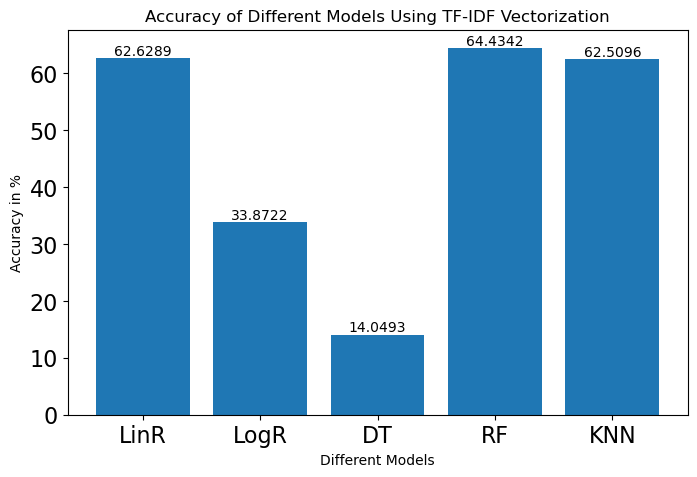

In [108]:
x, y = compare_modelsTF['model'],compare_modelsTF['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.title("Accuracy of Different Models Using TF-IDF Vectorization")
plt.xlabel("Different Models")
plt.ylabel("Accuracy in %")
plt.show()

### BAG OF WORDS

In [109]:
modelBOW = ['LinR','LogR','DT','RF','KNN']
dataBOW = {'model':modelBOW,'accuracy':accuracyBOW['BOW']}
compare_modelsBOW = pd.DataFrame(dataBOW)
compare_modelsBOW

model   accuracy
0  LinR  61.755642
1  LogR  42.802156
2    DT  13.394919
3    RF  63.933795
4   KNN  59.584296

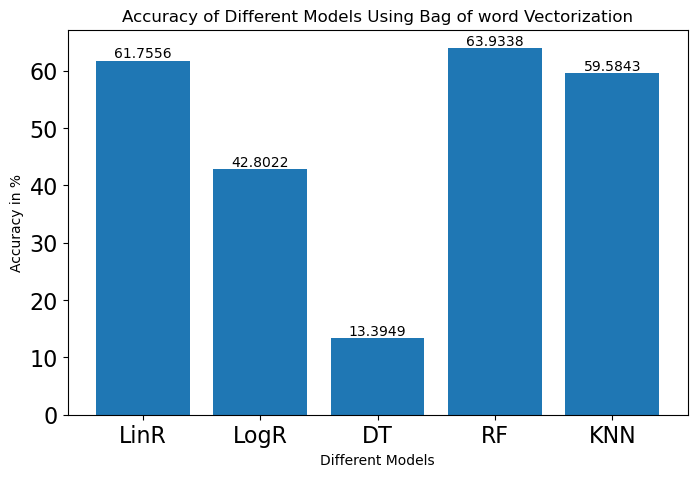

In [110]:
x, y = compare_modelsBOW['model'],compare_modelsBOW['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.title("Accuracy of Different Models Using Bag of word Vectorization")
plt.xlabel("Different Models")
plt.ylabel("Accuracy in %")
plt.show()